The World Happiness Report is a landmark survey of the state of global happiness.The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('world_happiness_report.csv')

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

There are 12 columns and 158 rows in the dataset

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Above are the name of all the attributes

In [6]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [7]:
pd.set_option('display.max_rows',None)

In [8]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [9]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

No null values present

In [10]:
from sklearn.preprocessing import OrdinalEncoder


In [11]:
oe=OrdinalEncoder()
df['Country']=oe.fit_transform(df['Country'].values.reshape(-1,1))

In [12]:
df['Region']=oe.fit_transform(df['Region'].values.reshape(-1,1))

Two columns with object type data were changed to numeric values

In [13]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [14]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


There are no null values in the dataset.
Family,Health-left skewed.
Corruption is right skewed as mean is greater than median.

# Univariate analysis

<AxesSubplot:ylabel='Frequency'>

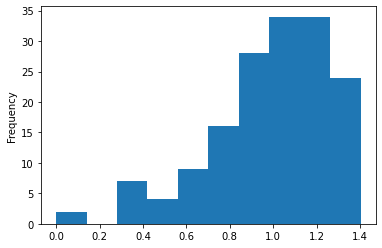

In [15]:
df['Family'].plot.hist()

histogram depicts that the column is left skewed

<AxesSubplot:ylabel='Frequency'>

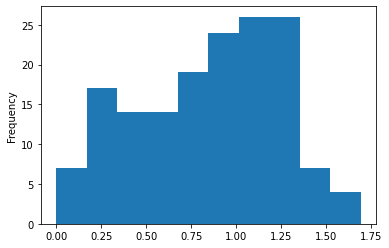

In [16]:
df['Economy (GDP per Capita)'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

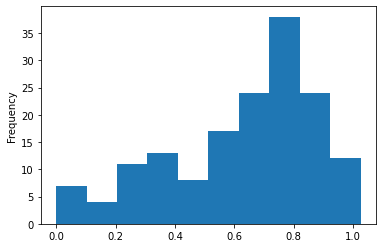

In [17]:
df['Health (Life Expectancy)'].plot.hist()

The above graph also shows left skewness

<AxesSubplot:ylabel='Frequency'>

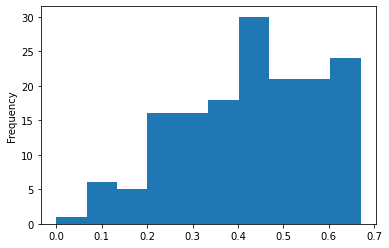

In [18]:
df['Freedom'].plot.hist()

Data is not normally diatributed and is left skewed

<AxesSubplot:ylabel='Frequency'>

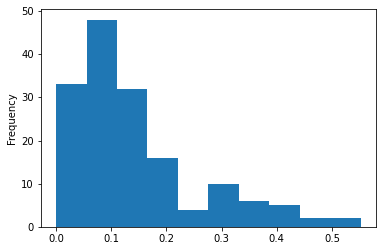

In [19]:
df['Trust (Government Corruption)'].plot.hist()

Above column clearly depicts that the dat is right skewed.

<AxesSubplot:ylabel='Frequency'>

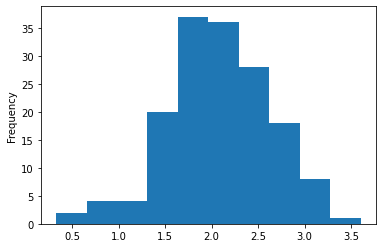

In [20]:
df['Dystopia Residual'].plot.hist()

Above column is almost normally distributed

<AxesSubplot:ylabel='Frequency'>

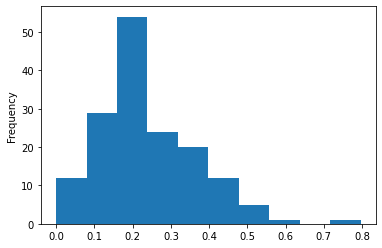

In [21]:
df['Generosity'].plot.hist()

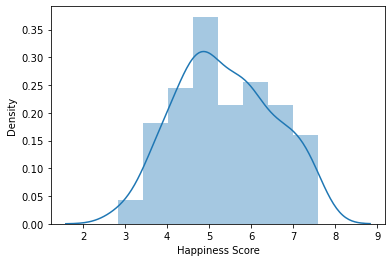

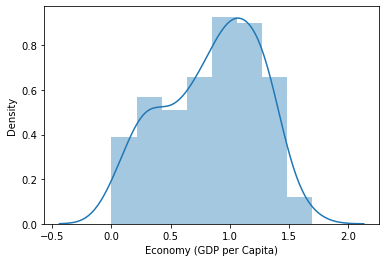

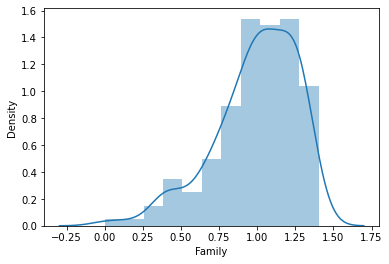

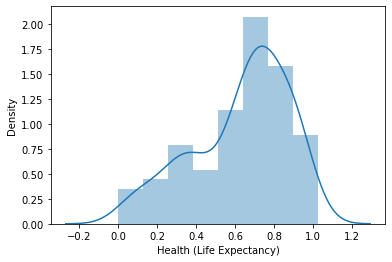

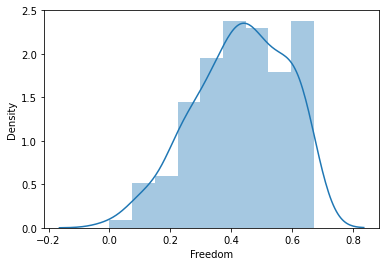

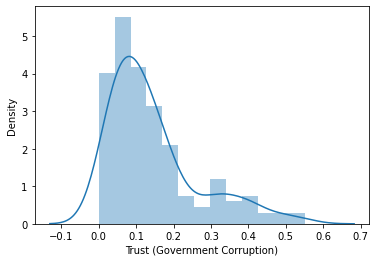

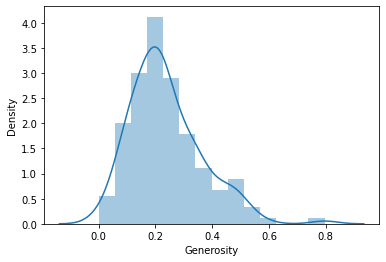

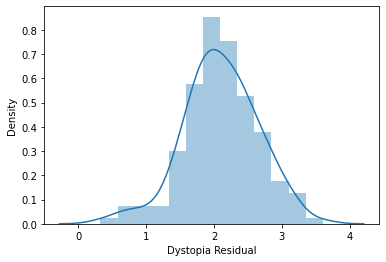

In [22]:
columns=['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)',
       'Generosity','Dystopia Residual']
for i in df[columns]:
    plt.figure()
    sb.distplot(df[i])

Above distribution plot gives an idea of the data distribution and skewness.Family,Life expectancy and freedom are seen to be slightly left skewed.while generousity and Trust(corruption) are right skewed.

# Bivariate analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


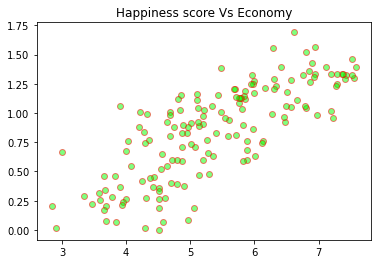

In [23]:
plt.scatter(df['Happiness Score'],df['Economy (GDP per Capita)'],alpha=0.5,c=(0,1,0),edgecolors='r')
plt.title('Happiness score Vs Economy')
plt.show()

This scatter plot gives an idea that happiness score is positively correlated/effected by economy

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


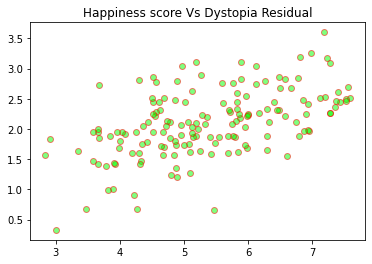

In [24]:
plt.scatter(df['Happiness Score'],df['Dystopia Residual'],alpha=0.5,c=(0,1,0),edgecolors='r')
plt.title('Happiness score Vs Dystopia Residual')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


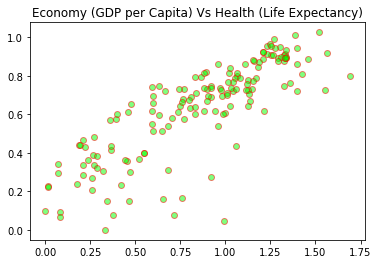

In [25]:
plt.scatter(df['Economy (GDP per Capita)'],df['Health (Life Expectancy)'],alpha=0.5,c=(0,1,0),edgecolors='r')
plt.title('Economy (GDP per Capita) Vs Health (Life Expectancy)')
plt.show()

Economy of a country greatly affects the life expectancy of citizens

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


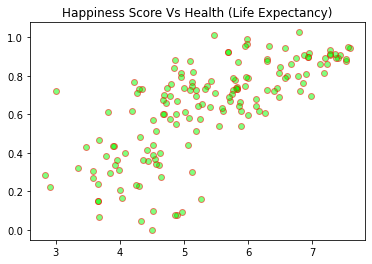

In [26]:
plt.scatter(df['Happiness Score'],df['Health (Life Expectancy)'],alpha=0.5,c=(0,1,0),edgecolors='r')
plt.title('Happiness Score Vs Health (Life Expectancy)')
plt.show()

Happiness score and health are positively correlated

# multivariate analysis

correlation

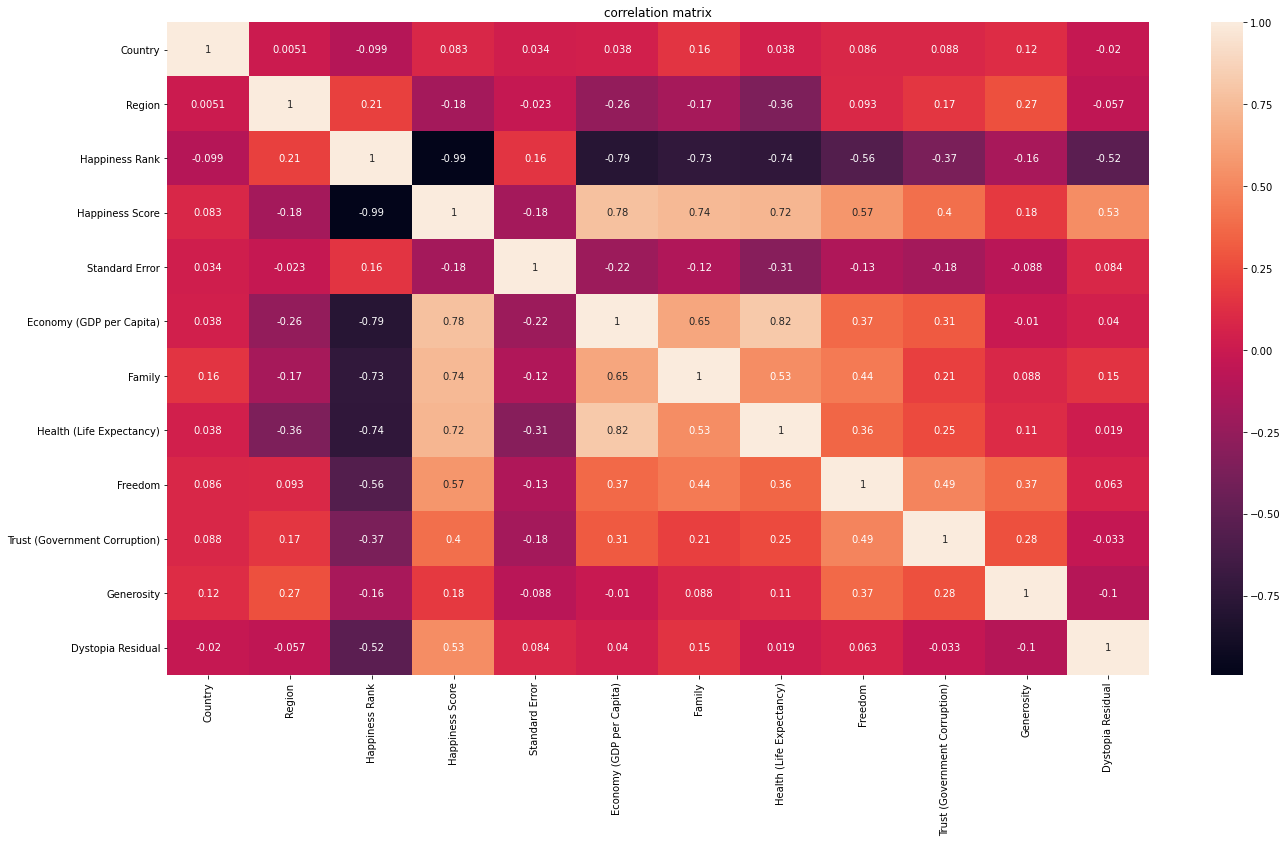

In [27]:
cor=df.corr()
plt.figure(figsize=[22,12])
sb.heatmap(cor,annot=True)
plt.title('correlation matrix')
plt.show()

In [28]:
#To see the correlation of target column with other attributes
cor['Happiness Score'].sort_values(ascending=False)


Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Country                          0.083380
Region                          -0.176791
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

From the correlation graph it is clear that Economy,Family and Health are positively correlated to Happiness score.

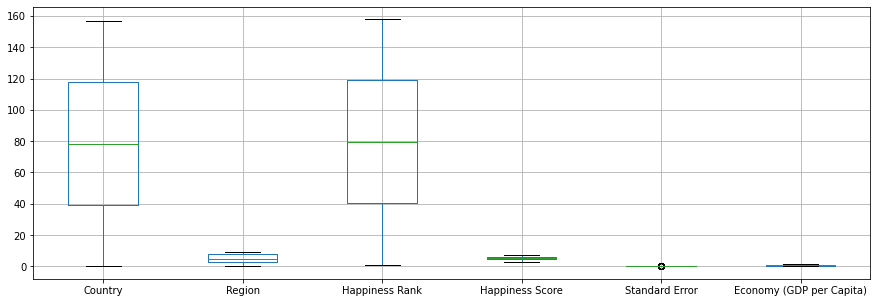

In [29]:
#To check outliers
df.iloc[:,0:6].boxplot(figsize=[15,6])
plt.subplots_adjust(bottom=0.25)
plt.show()

<AxesSubplot:>

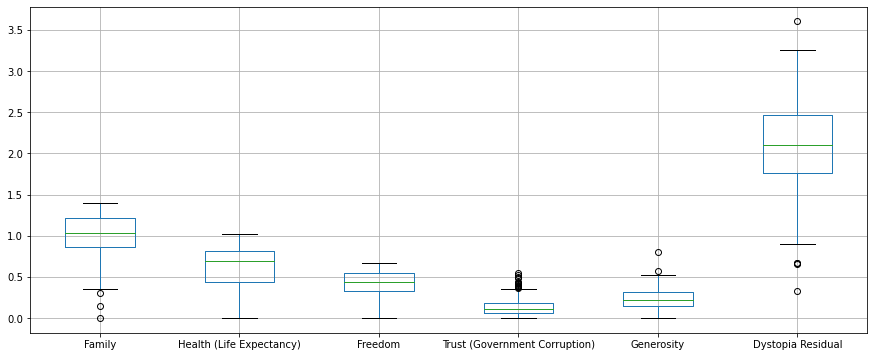

In [30]:
df.iloc[:,6:].boxplot(figsize=[15,6])


Outliers are seen in Family,Dystopia,Generosity and Trust Column which is treated below

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [32]:
df.shape

(158, 12)

In [33]:
new_df.shape

(149, 12)

percent loss=5.6

# Splitting of Data

In [34]:
new_df.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [35]:
x=new_df.drop('Happiness Score',axis=1)
y=new_df['Happiness Score']

In [36]:
x.shape

(149, 11)

In [37]:
y.shape

(149,)

In [38]:
x.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [39]:
from sklearn.preprocessing import power_transform
dfs=power_transform(x)
dfs=pd.DataFrame(dfs,columns=x.columns)
x=dfs

In [40]:
x.skew()

Country                         -0.267371
Region                          -0.222589
Happiness Rank                  -0.266578
Standard Error                  -0.031216
Economy (GDP per Capita)        -0.140644
Family                          -0.148528
Health (Life Expectancy)        -0.190663
Freedom                         -0.076489
Trust (Government Corruption)    0.174593
Generosity                       0.025172
Dystopia Residual                0.014748
dtype: float64

In [41]:
x=dfs

In [42]:
dfs.head(2)

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.190155,1.234514,-2.051514,-0.950337,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255
1,-0.300487,1.234514,-1.995844,0.378562,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168


# Model Building

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Choosing the best random state

In [44]:
from sklearn.linear_model import LinearRegression
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lnr=LinearRegression()
    lnr.fit(x_train,y_train)
    predlnr=lnr.predict(x_test)
    r2=r2_score(y_test,predlnr)
    if r2>maxaccu:
        maxaccu=r2
        maxrs=i
print(maxaccu)
print(maxrs)

0.9986494156950751
37


Best random state is found to be 37

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=37)

# choosing the best model

In [46]:
lnr=LinearRegression()
lnr.fit(x_train,y_train)
lnr.coef_

array([ 1.20942768e-02, -3.21630087e-02, -3.16150772e-01,  1.44471095e-04,
        2.96877415e-01,  1.69663480e-01,  1.58600711e-01,  1.16842242e-01,
        5.13419774e-02,  8.23452694e-02,  3.64170210e-01])

In [47]:
lnr.score(x_train,y_train)

0.9946090934661538

In [48]:
predlnr=lnr.predict(x_test)
print('mae_lnr',mean_absolute_error(y_test,predlnr))
print('mse_lnr',mean_squared_error(y_test,predlnr))
print('r2 score_lnr',r2_score(y_test,predlnr))     

mae_lnr 0.0386286830375409
mse_lnr 0.0020636695451899272
r2 score_lnr 0.9986494156950751


The r2 score of Linear model was found to be 0.998.

In [49]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.9988269682402192

In [50]:
predrfr=rfr.predict(x_test)
print('mae_rfr',mean_absolute_error(y_test,predrfr))
print('mse_rfr',mean_squared_error(y_test,predrfr))
print('r2 score_rfr',r2_score(y_test,predrfr)) 

mae_rfr 0.04471399999999998
mse_rfr 0.0029780818288889397
r2 score_rfr 0.9980509715878426


In [51]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

In [52]:
preddtr=dtr.predict(x_test)
print('mae_dtr',mean_absolute_error(y_test,preddtr))
print('mse_dtr',mean_squared_error(y_test,preddtr))
print('r2 score_dtr',r2_score(y_test,preddtr)) 

mae_dtr 0.11013333333333336
mse_dtr 0.02720782222222224
r2 score_dtr 0.9821936328177311


# Cross validation 


In [53]:
from sklearn.model_selection import cross_val_score
print ("cross val score for decision tree regressor is:",cross_val_score(dtr,x,y,scoring='r2',cv=5).mean())
print ("cross val score for linear regression is:",cross_val_score(lnr,x,y,scoring='r2',cv=5).mean())
print ("cross val score for random forest regressor is:",cross_val_score(rfr,x,y,scoring='r2',cv=5).mean())

cross val score for decision tree regressor is: -1.4519517840459337
cross val score for linear regression is: 0.8614358841374914
cross val score for random forest regressor is: -1.706694712490513


So we will choose linear regression for our model.
However model is showing overfitting issue as r2 score after cross validation is less.

# Regularisation

In [54]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Lasso

In [55]:
parameters={'alpha':[.0001,.001,.01,.1]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'alpha': 0.0001}

Best parameter for Lasso is alpha=.0001

In [56]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
ls.coef_

array([ 0.01201021, -0.03164391, -0.32569959,  0.        ,  0.29364143,
        0.16747578,  0.15639685,  0.11546249,  0.05048868,  0.0812843 ,
        0.35971998])

In [57]:
predls=ls.predict(x_test)
print('r2 score_ls',r2_score(y_test,predls))
print ("cross val score for Lasso is:",cross_val_score(ls,x,y,scoring='r2',cv=5).mean())

r2 score_ls 0.9986544569336068
cross val score for Lasso is: 0.8605508066487891


# Ridge

In [58]:
parameters={'alpha':[.0001,.001,.01,.1]}
rd=Ridge()
clf1=GridSearchCV(rd,parameters)
clf1.fit(x_train,y_train)
clf1.best_params_

{'alpha': 0.1}

Best parameter was found to be alpha:0.1

In [59]:
rd=Ridge(alpha=.1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
rd.coef_

array([ 1.22111188e-02, -3.19535732e-02, -3.21162943e-01,  7.97447861e-05,
        2.94287867e-01,  1.68671273e-01,  1.57919375e-01,  1.16071754e-01,
        5.11251093e-02,  8.15848769e-02,  3.61419194e-01])

In [60]:
predrd=rd.predict(x_test)
print('r2 score_ls',r2_score(y_test,predrd))
print ("cross val score for Ridge is:",cross_val_score(rd,x,y,scoring='r2',cv=5).mean())

r2 score_ls 0.9986575893549068
cross val score for Ridge is: 0.8653667679702381


# Final Model

In [61]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
ls.coef_
predls=ls.predict(x_test)
print('r2 score_ls',r2_score(y_test,predls))

r2 score_ls 0.9986544569336068


# Saving the model

In [62]:
import joblib

In [63]:
filename='finalwhrmodel.pkl'


In [64]:
joblib.dump(ls,'finalwhrmodel.pkl')

['finalwhrmodel.pkl']